In [2]:
import torch

# Data

In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
len(words)

32033

In [6]:
min(len(w) for w in words)

2

In [7]:
max(len(w) for w in words)

15

# Bigram

In [8]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [10]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [11]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    # print(ch1, ch2)
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [12]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(16,16))
# plt.imshow(N, cmap='Blues')
# for i in range(27):
#     for j in range(27):
#         chstr = itos[i] + itos[j]
#         plt.text(j, i, chstr, ha="center", va="bottom", color='black')
#         plt.text(j, i, N[i, j].item(), ha="center", va="top", color='black')
# plt.axis('off');
# # plt.savefig("character_heatmap.png", dpi=100, bbox_inches="tight")
# plt.show()

## Next charactor probability
For a given charactor (e.g. 'h'), what is the probability of next character (e.g.'a')?

The calculation is essentially performing row-wise probility

Note:
1. use `keepdims` to keep the dimension

In [13]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [14]:
P[:, 0]

tensor([3.1192e-05, 1.9583e-01, 4.3039e-02, 2.7536e-02, 9.3609e-02, 1.9482e-01,
        8.6910e-02, 5.5783e-02, 3.1532e-01, 1.4046e-01, 2.4599e-02, 7.1837e-02,
        9.4029e-02, 7.7523e-02, 3.6853e-01, 1.0752e-01, 3.2289e-02, 9.6990e-02,
        1.0827e-01, 1.4386e-01, 8.6475e-02, 4.9336e-02, 3.4231e-02, 5.4393e-02,
        2.2790e-01, 2.0484e-01, 6.6392e-02])

In [15]:
g = torch.Generator().manual_seed(2025)
for i in range(10):
    out = []
    idx = 0
    while True:
        p = P[idx]
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[idx])
        if idx == 0:
            break
    print("".join(out))

visthlynnnn.
draclalelaika.
deelax.
ka.
ereien.
derbinnonos.
shycleria.
lahamanabor.
jentrwairtiti.
ssha.


In [16]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

Goal: maximize the likelihood function: $$\prod{P_{i{\rightarrow}j}} = \prod{W_{ij}}$$
equivilent to minimizing the log likelihood: $$loss=-\log{\prod{W_{ij}}} = -\sum{\log{W_{ij}}}$$
ATTENTION!!  
Sum over `(i,j)` is over all possible `(i,j)` pairs in the **dataset**, in our case there are ~228k of them!

In [17]:
log_likelihood = 0.0
n = 0

for w in words: # 2.4543
# for w in ["andrej"]: # 3.0367
# for w in ["acexhlaahllhekhclalelaika"]: # 3.2235
# for w in ["ihaiaxrkhherhieikaoaaikaokhyokhkclhriaalahoia"]: # 3.6665
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    if n<=5:
      print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
    


nll = -log_likelihood
print(f"\nTotal number of possble pairs: {n:d}")
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n}')

.e: 0.0478 -3.0410
em: 0.0377 -3.2793
mm: 0.0253 -3.6753
ma: 0.3885 -0.9454
a.: 0.1958 -1.6305

Total number of possble pairs: 228146
log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


### Create training set

In [58]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [59]:
xs

tensor([ 0,  5, 13, 13,  1])

In [60]:
ys

tensor([ 5, 13, 13,  1,  0])

In [104]:
nll = 0
for (x, y) in zip(xs, ys):
    nll -= P[x, y].log()
nll /= len(xs)
print(nll)

tensor(2.5143)


### Vectorized nll calculation

In [62]:
xs

tensor([ 0,  5, 13, 13,  1])

In [63]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

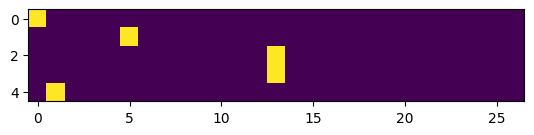

In [64]:
from matplotlib import pyplot as plt
plt.imshow(xenc)

In [65]:
xenc.dtype

torch.float32

#### One hot encoding is essentially **row retrieval**

In [66]:
# (5, 27) @ (27, 1) -> (5, 1)
W = torch.randn((27, 1))
xenc @ W

tensor([[ 0.8057],
        [-0.1819],
        [-0.9100],
        [-0.9100],
        [-0.1447]])

In [67]:
W[xs]

tensor([[ 0.8057],
        [-0.1819],
        [-0.9100],
        [-0.9100],
        [-0.1447]])

### OPTIMIZATION single step

In [106]:
# (5, 27) @ (27, 27) -> (5, 27)
g = torch.Generator().manual_seed(2025)
W = torch.randn((27, 27), generator=g, requires_grad=True)
W[:5]

tensor([[-1.1607, -1.5591,  0.7782, -0.9990, -0.3729, -0.1594,  0.2836, -1.1234,
          0.9813, -1.7471, -0.2819,  0.1437,  1.6156,  0.1340,  0.2344,  1.3478,
         -0.8244, -0.5120,  0.3246,  0.9116,  0.4670,  1.1802,  0.3709, -2.0193,
         -1.7463,  1.7367, -0.0385],
        [-0.1079, -1.1414,  0.3533, -0.0972, -0.1674, -0.8230,  1.5285,  0.5849,
          0.2286,  1.3484,  0.3098, -1.3261, -1.1577, -0.5698, -0.2010, -1.5212,
         -0.1028, -1.3112,  0.8517, -0.5402, -0.8619, -0.8897, -0.0430, -0.0234,
          0.3451,  0.4353,  0.3396],
        [-0.1216, -1.4042, -0.7816, -0.0619, -0.6913,  0.1283,  0.0171, -0.6039,
         -0.2212, -0.6068,  0.9244,  1.5373,  0.9788,  0.3045,  0.2875, -0.5763,
         -1.2434,  2.5755,  0.2263, -1.1001,  0.0859, -0.3946,  0.7082, -0.6777,
         -1.0835,  1.0831, -1.7251],
        [-0.3459,  1.9443,  2.9956,  0.4264, -0.6470,  0.9924, -0.7880,  0.8784,
         -0.5795,  0.9157,  1.7834, -0.7768, -2.0405,  0.7085,  1.2933, -1.8107

#### Use softmax to turn logits into probabilities
$$p_i=\frac{\exp(x_i)}{\sum{\exp{x_i}}}$$
$$\sum{p_i}=1$$
logits: $x_i$  
counts: $\exp{x_i}$

In [109]:
counts = W.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs[:5]

tensor([[0.0077, 0.0052, 0.0538, 0.0091, 0.0170, 0.0211, 0.0328, 0.0080, 0.0659,
         0.0043, 0.0186, 0.0285, 0.1243, 0.0283, 0.0312, 0.0951, 0.0108, 0.0148,
         0.0342, 0.0615, 0.0394, 0.0805, 0.0358, 0.0033, 0.0043, 0.1404, 0.0238],
        [0.0288, 0.0103, 0.0458, 0.0292, 0.0272, 0.0141, 0.1482, 0.0577, 0.0404,
         0.1237, 0.0438, 0.0085, 0.0101, 0.0182, 0.0263, 0.0070, 0.0290, 0.0087,
         0.0753, 0.0187, 0.0136, 0.0132, 0.0308, 0.0314, 0.0454, 0.0497, 0.0451],
        [0.0206, 0.0057, 0.0107, 0.0219, 0.0117, 0.0265, 0.0237, 0.0127, 0.0187,
         0.0127, 0.0587, 0.1083, 0.0620, 0.0316, 0.0310, 0.0131, 0.0067, 0.3059,
         0.0292, 0.0077, 0.0254, 0.0157, 0.0473, 0.0118, 0.0079, 0.0688, 0.0041],
        [0.0111, 0.1101, 0.3150, 0.0241, 0.0082, 0.0425, 0.0072, 0.0379, 0.0088,
         0.0394, 0.0937, 0.0072, 0.0020, 0.0320, 0.0574, 0.0026, 0.0083, 0.0349,
         0.0252, 0.0191, 0.0094, 0.0317, 0.0316, 0.0050, 0.0314, 0.0019, 0.0022],
        [0.0235, 0.0162,

In [110]:
probs.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       grad_fn=<SumBackward1>)

#### Loss function

In [111]:
loss = -probs[xs, ys].log().mean()
print(loss) # Bigram: 2.45

tensor(4.4614, grad_fn=<NegBackward0>)


#### Gradient Descent

In [115]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [116]:
W.data -= 1 * W.grad

In [117]:
counts = W.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[xs, ys].log().mean()
print(loss)

tensor(4.0340, grad_fn=<NegBackward0>)


### OPTIMIZATION loop

#### create the dataset

In [118]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

number of examples:  228146


#### Train

In [119]:
# initialize the 'network'
g = torch.Generator().manual_seed(2025)
W = torch.randn((27, 27), generator=g, requires_grad=True)
lr = 50 # learning rate

# gradient descent
for k in range(500):
    # forward pass
    counts = W.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[xs, ys].log().mean()
    if not (k % 20):
        print(loss.item())
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
  
    # update
    W.data += -lr * W.grad 

3.776524782180786
2.5711255073547363
2.5134506225585938
2.4918532371520996
2.4807255268096924
2.4742610454559326
2.470158815383911
2.4673547744750977
2.4653282165527344
2.46380352973938
2.4626243114471436
2.4616918563842773
2.460939407348633
2.460320472717285
2.4598021507263184
2.459360361099243
2.4589788913726807
2.4586451053619385
2.458350896835327
2.4580893516540527
2.457855463027954
2.4576449394226074
2.4574544429779053
2.4572811126708984
2.4571237564086914


### Add regularization term
$$loss = -\sum{\log{W_{ij}}} + \lambda\cdot\lVert W \lVert$$

In [120]:
# initialize the 'network'
g = torch.Generator().manual_seed(2025)
W = torch.randn((27, 27), generator=g, requires_grad=True)
lr = 50
lambda_ = 0.01

# gradient descent
for k in range(500):
    # forward pass
    counts = W.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[xs, ys].log().mean() + lambda_ * (W**2).mean()
    if not (k % 20):
        print(loss.item())
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
  
    # update
    W.data += -lr * W.grad

3.786322832107544
2.581151008605957
2.5258102416992188
2.5060460567474365
2.4964168071746826
2.491149663925171
2.4880118370056152
2.486006021499634
2.4846532344818115
2.4837069511413574
2.4830262660980225
2.4825243949890137
2.4821462631225586
2.4818546772003174
2.4816250801086426
2.481440782546997
2.4812917709350586
2.481168746948242
2.481066942214966
2.4809813499450684
2.4809091091156006
2.4808478355407715
2.4807956218719482
2.480750799179077
2.4807119369506836


### Sample from the neural network model

#### Previously, smaple from Bigram

In [121]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2025)
for i in range(10):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

visthlynnnn.
draclalelaika.
deelax.
ka.
ereien.
derbinnonos.
shycleria.
lahamanabor.
jentrwairtiti.
ssha.


#### Now, smaple from the trained neural network

In [122]:
# finally, sample from the 'neural net' model
counts = W.exp()
p_net = counts / counts.sum(1, keepdims=True)
g = torch.Generator().manual_seed(2025)
for i in range(10):
  out = []
  ix = 0
  while True:
    p = p_net[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

visthlynnnn.
draclalelaika.
deelaxwn.
bereien.
derbinnonosde.
kileria.
lahamanabor.
jenarwairtiti.
ssha.
joviandarielam.
